In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the Datasheet

In [4]:
df = pd.read_excel('Sales_data.xlsx')
df.head(16)

,Sale Date,Customer Name,City,State,Region,Product Category,Product Name,Quantity,Price per Unit,Sales Amount,Month
0,2023-09-21,Aryan,Pune,Maharashtra,West,Furniture,Sofa,9,722.44,6501.96,September
1,2023-09-15,Ishita,Vadodara,Gujarat,West,Electronics,Smartphone,11,4463.48,49098.28,September
2,2023-09-02,Meera,Dwarka,Delhi,North,Stationery,Ruler,12,3040.08,36480.96,September
3,2023-09-03,Ananya,Mysuru,Karnataka,South,Electronics,Laptop,8,4649.35,37194.80,September
4,2023-09-03,Ishita,Pune,Maharashtra,West,Clothing,Shirt,14,3404.40,47661.60,September
5,2023-09-23,Meera,Karol Bagh,Delhi,North,Electronics,Laptop,20,598.97,11979.40,September
6,2023-09-11,Aarav,Ahmedabad,Gujarat,West,Furniture,Chair,20,4055.72,81114.40,September
7,2023-09-25,Ananya,Bengaluru,Karnataka,South,Stationery,Ruler,4,4837.17,19348.68,September
8,2023-09-06,Vihaan,Nagpur,Maharashtra,West,Electronics,Laptop,6,2920.43,17522.58,September
9,2023-09-04,Meera,Surat,Gujarat,West,Clothing,Dress,17,3857.33,65574.61,September


## data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale Date         1000 non-null   datetime64[ns]
 1   Customer Name     1000 non-null   object        
 2   City              1000 non-null   object        
 3   State             1000 non-null   object        
 4   Region            1000 non-null   object        
 5   Product Category  1000 non-null   object        
 6   Product Name      1000 non-null   object        
 7   Quantity          1000 non-null   int64         
 8   Price per Unit    1000 non-null   float64       
 9   Sales Amount      1000 non-null   float64       
 10  Month             1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB


## Details about data

In [6]:
df.describe()

,Sale Date,Quantity,Price per Unit,Sales Amount
count,1000,1000.000000,1000.000000,1000.000000
mean,2023-06-30 20:58:33.600000256,10.574000,2633.099270,27341.929690
min,2023-01-02 00:00:00,1.000000,102.620000,403.200000
25%,2023-03-29 18:00:00,6.000000,1412.810000,9319.920000
50%,2023-06-28 00:00:00,10.000000,2631.350000,22178.995000
75%,2023-10-03 06:00:00,16.000000,3893.765000,41310.465000
max,2023-12-31 00:00:00,20.000000,4997.450000,99406.600000
std,NaN,5.788785,1407.442249,21724.627031


## check columns

In [7]:
df.columns

Index(['Sale Date', 'Customer Name', 'City', 'State', 'Region',
       'Product Category', 'Product Name', 'Quantity', 'Price per Unit',
       'Sales Amount', 'Month'],
      dtype='object')

## Checking null values

In [8]:
df.isnull().sum()

Sale Date           0
Customer Name       0
City                0
State               0
Region              0
Product Category    0
Product Name        0
Quantity            0
Price per Unit      0
Sales Amount        0
Month               0
dtype: int64

## Checking duplicate

In [9]:
df.duplicated().sum()

np.int64(0)

## Checking datatypes 

In [10]:
df.dtypes

Sale Date           datetime64[ns]
Customer Name               object
City                        object
State                       object
Region                      object
Product Category            object
Product Name                object
Quantity                     int64
Price per Unit             float64
Sales Amount               float64
Month                       object
dtype: object

## Monthly Sales Trend

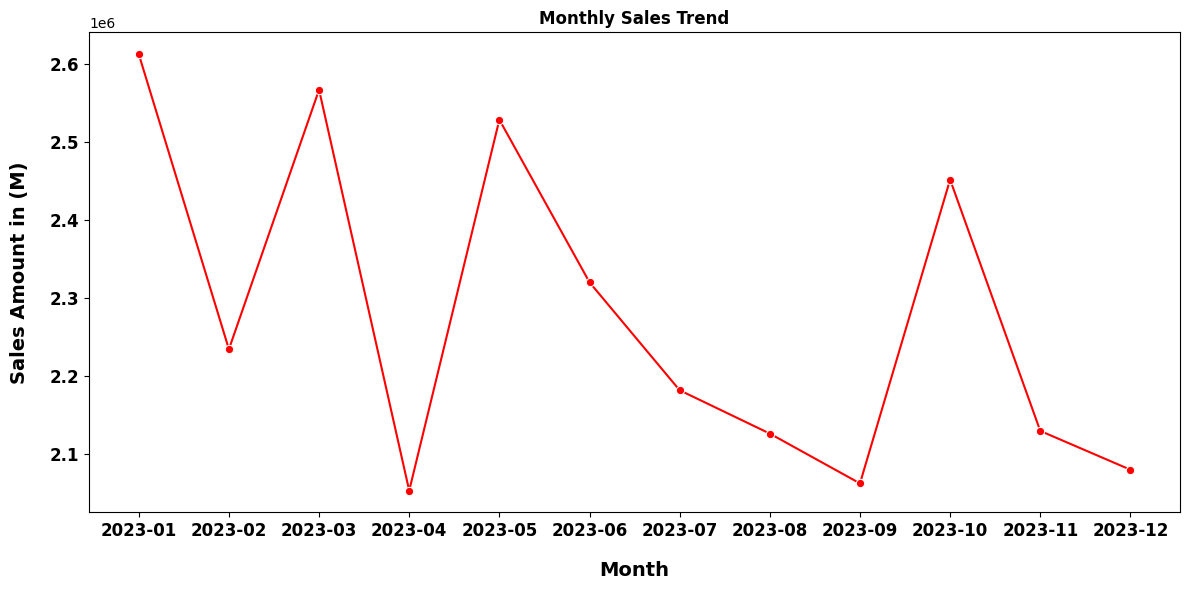

In [11]:
df['Month'] = pd.to_datetime(df['Sale Date']).dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales,x = 'Month', y = 'Sales Amount',marker='o', color='red')
plt.title("Monthly Sales Trend", fontsize=12, fontweight='bold')
plt.xlabel("Month", fontsize=14, fontweight='bold',labelpad=15)  
plt.ylabel("Sales Amount in (M)", fontsize=14, fontweight='bold',labelpad=15) 
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## Sales Distribution by Region

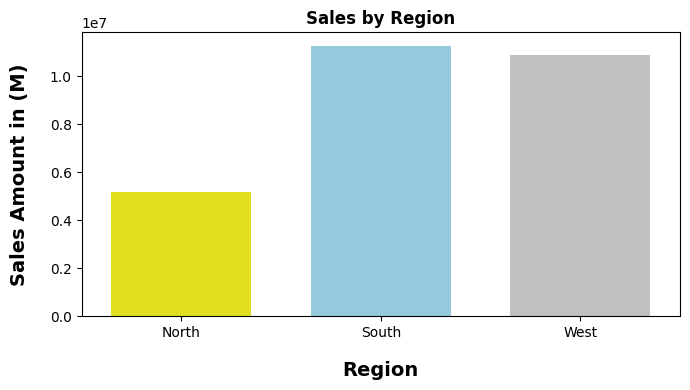

In [31]:
plt.figure(figsize=(7,4))
colors = ['yellow','skyblue','silver']
region_sales = df.groupby ('Region')['Sales Amount'].sum().reset_index()
sns.barplot(data = region_sales, x = 'Region', y = 'Sales Amount',hue = 'Region',width = 0.7, palette = colors)
plt.title("Sales by Region", fontsize=12, fontweight='bold')
plt.xlabel("Region", fontsize=14, fontweight='bold',labelpad=15)  
plt.ylabel("Sales Amount in (M)", fontsize=14, fontweight='bold',labelpad=15)
plt.tight_layout()
plt.show()

## Top Product Categories

C:\Users\bhas1\AppData\Local\Temp\ipykernel_13996\3300721914.py:4: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = category_sales, x = 'Product Category', y = 'Sales Amount',hue = 'Product Category', palette = colors,width= 0.7)


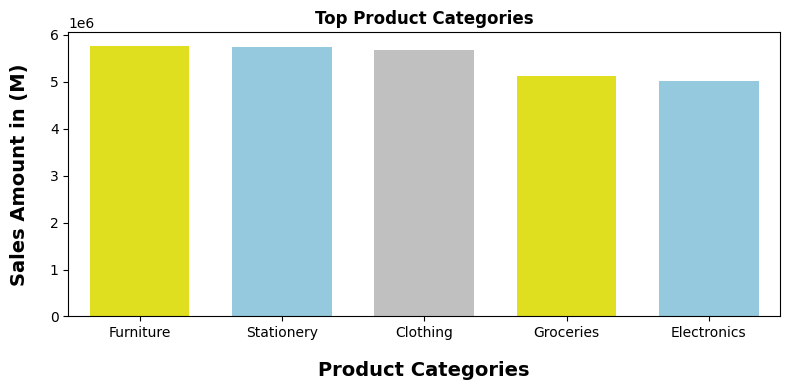

In [28]:
plt.figure(figsize=(8,4))
color = ['Royal Blue',' Deep Orange','Teal','Emerald Green','Golden Yellow']
category_sales = df.groupby('Product Category')['Sales Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data = category_sales, x = 'Product Category', y = 'Sales Amount',hue = 'Product Category', palette = colors,width= 0.7)
plt.title("Top Product Categories", fontsize=12, fontweight='bold')
plt.xlabel("Product Categories", fontsize=14, fontweight='bold',labelpad=15)  
plt.ylabel("Sales Amount in (M)", fontsize=14, fontweight='bold',labelpad=15)
plt.tight_layout()
plt.show()

## Quantity vs Sales 

<Figure size 200x200 with 0 Axes>

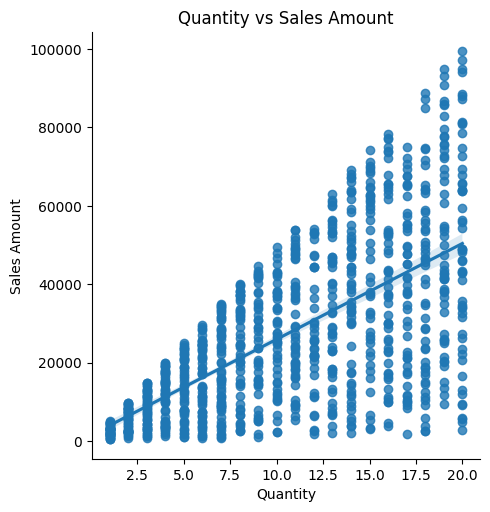

In [39]:
sns.lmplot(data=df, x='Quantity', y='Sales Amount')
plt.title("Quantity vs Sales Amount")
plt.show()


## Price Distribution

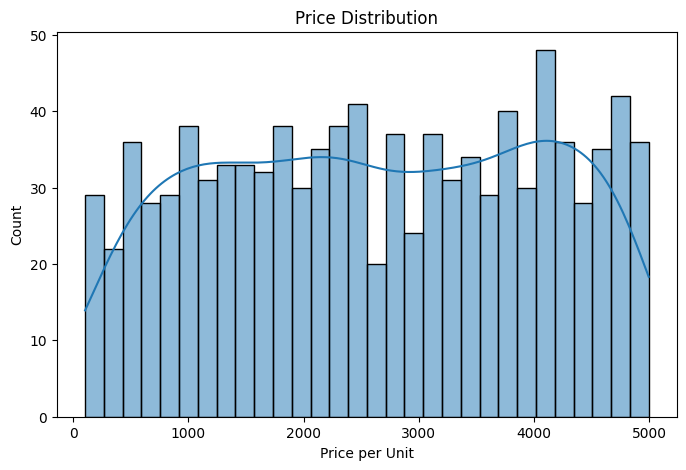

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price per Unit'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price per Unit")
plt.show()